In [189]:
# Librairies indispensables
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
# Importation des données

marketing_df = pd.read_csv('marketing.csv')
marketing_df.head()


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [191]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [192]:
# Les variables date_served, date_subscribed, date_canceled sont des dates et ne sont pas au bon format. 
#Nous les mettrons en Datetime

In [193]:
# Resume statistique
marketing_df.describe().T

,count,unique,top,freq
user_id,10037,7309,a100000882,12
date_served,10021,31,1/15/18,789
marketing_channel,10022,5,House Ads,4733
variant,10037,2,control,5091
converted,10022,2,False,8946
language_displayed,10037,4,English,9793
language_preferred,10037,4,English,9275
age_group,10037,7,19-24 years,1682
date_subscribed,1856,31,1/16/18,163
date_canceled,577,115,4/2/18,15


In [194]:
# Les canaux marketing utlisés par l'entreprise
marketing_df['marketing_channel'].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [195]:
# Proportions 
marketing_df['marketing_channel'].value_counts(normalize=True)

House Ads    0.472261
Instagram    0.186689
Facebook     0.185592
Push         0.099082
Email        0.056376
Name: marketing_channel, dtype: float64

In [196]:
# L'entreprise utilise majoritairement (47%) les annonces auto-promotionnelle

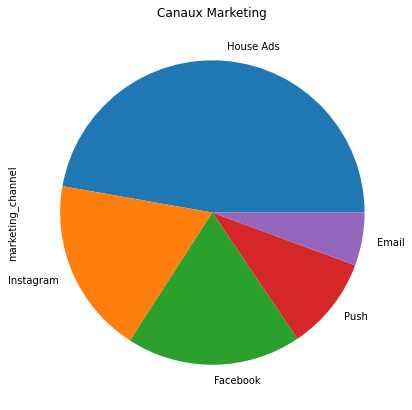

In [197]:
# Canaux marketing
plt.figure(figsize=(7,7))
marketing_df['marketing_channel'].value_counts(normalize=True).plot(kind='pie')
plt.title('Canaux Marketing')
plt.show()

In [198]:
# Mettre les variables dates en Datetime
for col in ['date_served', 'date_subscribed', 'date_canceled' ]:
    marketing_df[col] = pd.to_datetime(marketing_df[col])

In [199]:
#Verification du bon format date
marketing_df.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

In [200]:
# Les variables date_served, date_subscribed, date_canceled sont maintenant dans un bon format datetime.

In [201]:
# Quel est le nombre d'utilisateurs retenus par la campagnes marketing?

In [202]:
marketing_df['is_retained'].sum()

1279

In [203]:
# 1279 utilisateurs ont été retenus par la campagne marketing

In [204]:
marketing_df['is_retained'].value_counts(normalize=True)

True     0.689116
False    0.310884
Name: is_retained, dtype: float64

In [205]:
# En proportion cele equivaut à peu prés 0,69% de tous les utilisateurs

In [206]:
marketing_df['subscribing_channel'].unique()

array(['House Ads', 'Email', 'Push', 'Facebook', 'Instagram', nan],
      dtype=object)

In [207]:
# Dictionnaire des chaines distinctes de souscriptions avec leurs codes
dict_channels = {'House Ads':1, 'Instagram':2, 'Facebook':3, 'Push':4, 'Email':5}

In [208]:
# Creation de la colonne 'channel_code'
marketing_df['channel_code'] = marketing_df['subscribing_channel'].map(dict_channels)

In [209]:
# Ajout nouvelle colonne is_correct_lang
marketing_df['is_correct_lang'] = np.where(marketing_df['language_displayed']==marketing_df['language_preferred'],\
                                          'YES', 'NO')

In [210]:
#Ajout d'une colonne 'DoW' date de la semaine
marketing_df['DoW'] = marketing_df['date_subscribed'].dt.dayofweek

In [211]:
# utilisateurs uniques qui voient les annonces marketing chaque jour
daily_users = marketing_df.groupby('date_served')['user_id'].nunique()

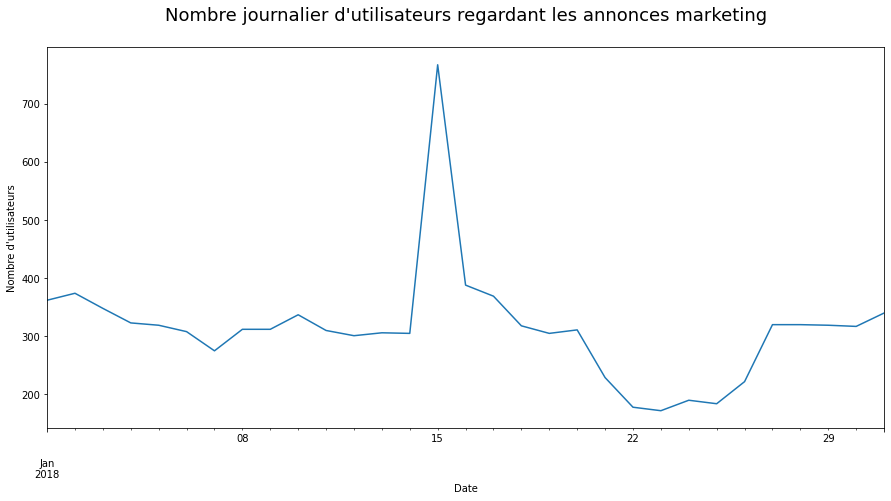

In [212]:
#Visualisation des resultats
plt.figure(figsize=(15,7))
daily_users.plot.line()
plt.xlabel('Date')
plt.ylabel("Nombre d'utilisateurs")
plt.title("Nombre journalier d'utilisateurs regardant les annonces marketing\n", fontsize=18)
plt.show()

In [213]:
# Calcul du taux de conversation global
# Nombre d'utilisateurs uniques
n_unique_users = marketing_df['user_id'].nunique()
print("Le nombre d'utilisateurs uniques est:", n_unique_users)

Le nombre d'utilisateurs uniques est: 7309


In [214]:
marketing_df["converted"]

0         True
1         True
2         True
3         True
4         True
         ...  
10032     True
10033     True
10034    False
10035     True
10036    False
Name: converted, Length: 10037, dtype: object

In [215]:
# Nombre d'utilisateurs uniques ayant suscrit au service
n_suscripteurs = marketing_df[marketing_df["converted"] == True]['user_id'].nunique()
print("Le nombre d'utilisateurs uniques ayant suscript au service est:", n_suscripteurs)

Le nombre d'utilisateurs uniques ayant suscript au service est: 1015


In [216]:
# Taux de conversion global
taux_conv_global = n_suscripteurs / n_unique_users
print(" Le taux de conversion global est egal à:", round(taux_conv_global*100, 2), "%")

 Le taux de conversion global est egal à: 13.89 %


In [217]:
marketing_df['is_retained']

0         True
1         True
2         True
3         True
4         True
         ...  
10032    False
10033     True
10034     True
10035     True
10036     True
Name: is_retained, Length: 10037, dtype: object

In [218]:
# Calcul du taux de retention global d'un mois
# Nombre de personnes qui sont restées abonnées
retained = marketing_df[marketing_df['is_retained'] == True]['user_id'].nunique()
print("Le nombre de personnes qui sont restées abonnées:", retained)

Le nombre de personnes qui sont restées abonnées: 678


In [219]:
taux_retained_global = retained / n_suscripteurs
print("Le taux de retention global est egal à:", round(taux_retained_global*100, 2), "%")

Le taux de retention global est egal à: 66.8 %


### Taux de retention par canal de souscription

In [220]:
# Nombre total d'utilisateurs retenus par canal de marketing
n_retained_per_canal = marketing_df[marketing_df['is_retained'] == True].\
                            groupby('subscribing_channel')['user_id'].nunique()
print(n_retained_per_canal)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [221]:
# Nombre total d'utilisateurs ayant souscrit un abonnement via chaque canal
n_converted_per_canal = marketing_df[marketing_df['converted'] == True].\
                        groupby('subscribing_channel')['user_id'].nunique()
n_converted_per_canal

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

In [222]:
# Taux de retention par canal de souscription
taux_retention_per_canal = (n_retained_per_canal / n_converted_per_canal)*100
taux_retention_per_canal.sort_values(ascending=False)

subscribing_channel
Email        87.577640
Push         70.129870
Facebook     68.778281
Instagram    68.103448
House Ads    58.053691
Name: user_id, dtype: float64

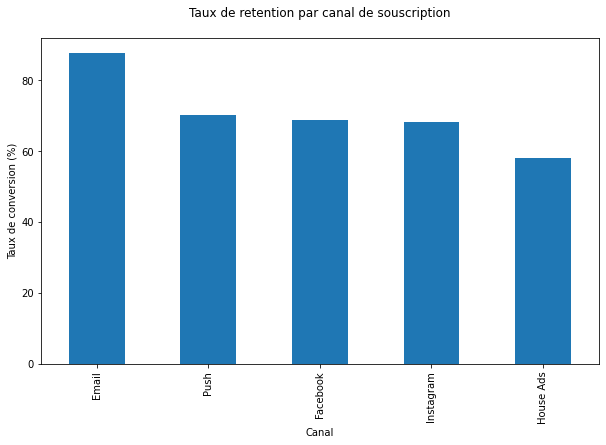

In [223]:
# Visualisation des resultats
plt.figure(figsize=(10,6))
taux_retention_per_canal.sort_values(ascending=False).plot(kind='bar')
plt.title("Taux de retention par canal de souscription\n", fontsize=12)
plt.xlabel("Canal")
plt.ylabel('Taux de conversion (%)')
plt.show()

In [224]:
# Les emails representent le taux de retention les plus eleves des canaux de souscription

### Automatisation du calcul taux de reteneion

In [225]:
# Fonction de calcul du taux de retention
def retention_rate(dataframe, column_names):
    retained =dataframe[dataframe['is_retained'] == True].groupby(column_names)['user_id'].nunique()
    
    converted = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    
    retention_rate = retained / converted
    
    return retention_rate
    

In [226]:
# Appel de la fonction retention_rate() pour la verifiction
retention_rate(marketing_df, ['subscribing_channel'])

subscribing_channel
Email        0.875776
Facebook     0.687783
House Ads    0.580537
Instagram    0.681034
Push         0.701299
Name: user_id, dtype: float64

In [227]:
# Taux de retention selon la langue d'affichage de l'annonce
taux_retention_per_langue = retention_rate(marketing_df, ['language_displayed'])
taux_retention_per_langue

language_displayed
Arabic     0.750000
English    0.668467
German     0.773585
Spanish    1.000000
Name: user_id, dtype: float64

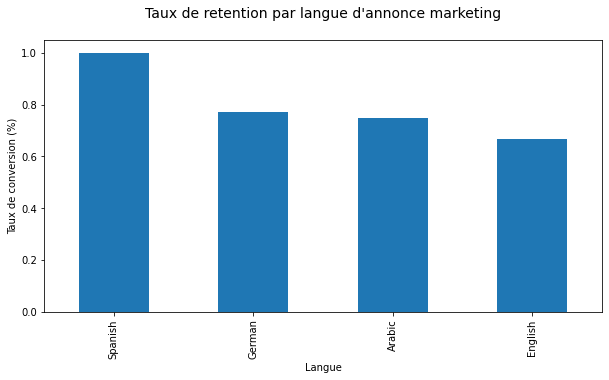

In [228]:
# Visualisation des resultats
plt.figure(figsize=(10, 5))
taux_retention_per_langue.sort_values(ascending = False).plot(kind='bar')
plt.title("Taux de retention par langue d'annonce marketing\n", fontsize=14)
plt.xlabel("Langue")
plt.ylabel("Taux de conversion (%)")
plt.show()


In [229]:
# L'espagnol offre le meilleur de retention environ 100%

In [230]:
# Taux de conversion pr canal d'acquisition
# Nombre d'utilisateurs uniques ayant suscrit au service
n_souscripteurs_par_canal = marketing_df[marketing_df['converted'] == True].\
                            groupby('subscribing_channel')['user_id'].nunique()


In [231]:
#Nombre total de personnes atteintes par la campagne pour chaque canal
total_per_canal = marketing_df.groupby('subscribing_channel')['user_id'].nunique() 

In [232]:
taux_conv_par_canal = (n_souscripteurs_par_canal / total_per_canal)*100
taux_conv_par_canal.sort_values(ascending = False)

subscribing_channel
Facebook     100.000000
House Ads    100.000000
Instagram    100.000000
Push         100.000000
Email         83.854167
Name: user_id, dtype: float64

### Automatisation du calcul  du taux de conversion

In [233]:
# Definition d'une fonction de calcul du taux de conversion
def conversion_rate(dataframe, column_names):
    # Nombre total d'utilisateurs converties
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    # Nombre total d'utilisateurs
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    # Taux de conversion
    conversion_rate = column_conv / column_total
    # Remplacement des valeurs manquantes par 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [234]:
# Verification de la fonction
conversion_rate(marketing_df, ['subscribing_channel'])

subscribing_channel
Email        0.838542
Facebook     1.000000
House Ads    1.000000
Instagram    1.000000
Push         1.000000
Name: user_id, dtype: float64

In [235]:
#verification OK

In [236]:
# Taux de conversion par langue de l'annonce
taux_conv_per_langue = conversion_rate(marketing_df, ['language_displayed'])
taux_conv_per_langue

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64

In [237]:
# L'allemand offre le meilleur taux de conversion environ 72 % et un taux de retention de 77 %.
# L'espagnol offre le meilleur taux de retention environ 100 %  mais un taux de conversion de 20 %

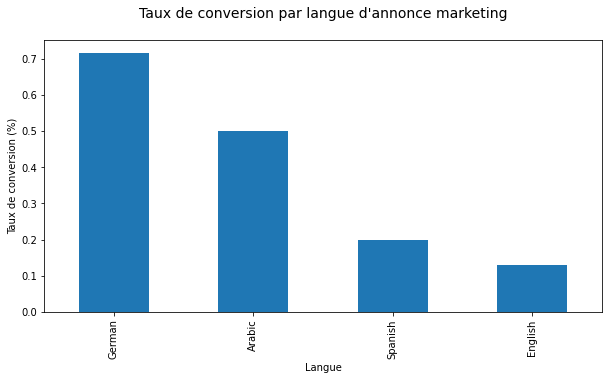

In [238]:
# Visualisation des resultats
plt.figure(figsize=(10, 5))
taux_conv_per_langue.sort_values(ascending = False).plot(kind='bar')
plt.title("Taux de conversion par langue d'annonce marketing\n", fontsize = 14)
plt.xlabel("Langue")
plt.ylabel("Taux de conversion (%)")
plt.show()

In [239]:
# les campagnes marketing en Allemand semblent plus efficaces que les autres langues 
# en ce qui concerne la conversion des utilisateurs.

### Taux de conversion journalier

In [240]:
# Calcul du taux de conversion journalier
taux_conv_journalier = conversion_rate(marketing_df, ['date_served'])
taux_conv_journalier.sort_values(ascending = False)

date_served
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-07    0.141818
2018-01-05    0.125392
2018-01-09    0.125000
2018-01-25    0.125000
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-10    0.118694
2018-01-24    0.115789
2018-01-08    0.115385
2018-01-06    0.113636
2018-01-15    0.113429
2018-01-04    0.108359
2018-01-03    0.103448
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-18    0.091195
2018-01-26    0.090090
2018-01-21    0.087336
2018-01-14    0.085246
2018-01-13    0.084967
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-20    0.067524
2018-01-30    0.066246
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-19    0.059016
2018-01-31    0.052941
Name: user_id, dtype: float64

In [241]:
# Transformation du resultat en dataframe
taux_conv_journalier = pd.DataFrame(taux_conv_journalier.reset_index())
taux_conv_journalier.columns = ['date_subscribed', 'conversion_rate']
taux_conv_journalier.head()

,date_subscribed,conversion_rate
0,2018-01-01,0.099448
1,2018-01-02,0.098930
2,2018-01-03,0.103448
3,2018-01-04,0.108359
4,2018-01-05,0.125392


In [242]:
taux_conv_journalier.tail()

,date_subscribed,conversion_rate
26,2018-01-27,0.065625
27,2018-01-28,0.062500
28,2018-01-29,0.059561
29,2018-01-30,0.066246
30,2018-01-31,0.052941


### Taux de conversion journalier par groupe d'ages

In [243]:
daily_conv_rate_age_group = conversion_rate(marketing_df, ['date_served', 'age_group'])
daily_conv_rate_age_group

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64

In [244]:
# Transformons ses données en dataframe
daily_conv_rate_age_group = pd.DataFrame(daily_conv_rate_age_group.unstack(level=1))
# level = 1 car c'est la variable age_group position 1 que l'on veut desemballer ( en python 0, 1 ...)
daily_conv_rate_age_group.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,0.155172,0.196721,0.105263,0.040816,0.042553,0.022222,0.086957
2018-01-02,0.180328,0.164384,0.114754,0.040000,0.043478,0.043478,0.024390
2018-01-03,0.102041,0.208955,0.150943,0.042553,0.060000,0.047619,0.043478
2018-01-04,0.117647,0.200000,0.183673,0.045455,0.043478,0.061224,0.073171
2018-01-05,0.142857,0.250000,0.136364,0.090909,0.068182,0.046512,0.088889


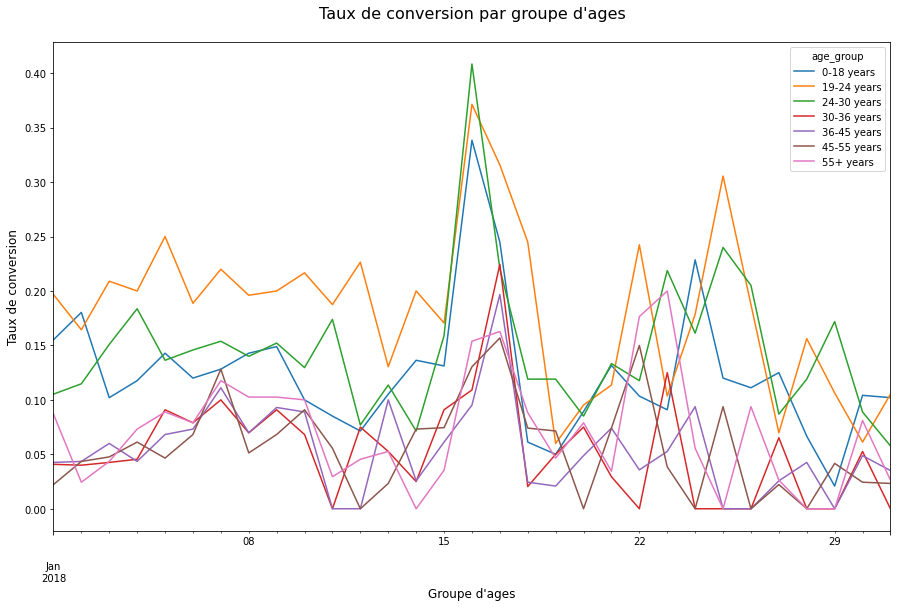

In [245]:
# Visualisation du resultat
daily_conv_rate_age_group.plot(kind='line', figsize=(15, 9))
plt.title("Taux de conversion par groupe d'ages\n", fontsize=16)
plt.xlabel("Groupe d'ages", fontsize=12)
plt.ylabel("Taux de conversion", fontsize=12)
plt.show()


### Taux de conversion journalier par canal marketing

In [246]:
daily_conv_rate_per_canal = conversion_rate(marketing_df, ['date_served', 'marketing_channel'])
daily_conv_rate_per_canal

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
                                    ...   
2018-01-31   Email                1.000000
             Facebook             0.078947
             House Ads            0.038217
             Instagram            0.041096
             Push                 0.052632
Name: user_id, Length: 155, dtype: float64

In [247]:
# Transformation en dataframe
daily_conv_rate_per_canal = pd.DataFrame(daily_conv_rate_per_canal.unstack(level=1))
daily_conv_rate_per_canal.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1.0,0.117647,0.084656,0.106667,0.083333
2018-01-02,1.0,0.098361,0.077982,0.129032,0.055556
2018-01-03,0.0,0.080645,0.088542,0.171875,0.083333
2018-01-04,0.5,0.138462,0.089820,0.126984,0.058824
2018-01-05,1.0,0.112903,0.126582,0.159420,0.027778


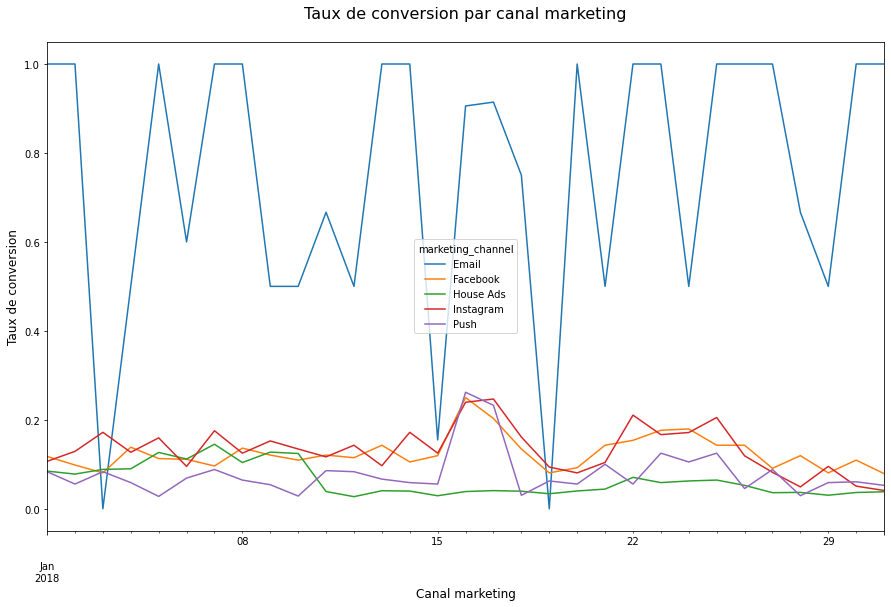

In [248]:
# Visualisation
daily_conv_rate_per_canal.plot(kind='line', figsize=(15, 9))
plt.title("Taux de conversion par canal marketing\n", fontsize=16)
plt.xlabel("Canal marketing", fontsize=12)
plt.ylabel("Taux de conversion", fontsize=12)
plt.show()

### Taux de conversion par jour de semaine et par canal marketing

In [249]:
# Colonne jour de la semaine où l'annonce a été diffusée
marketing_df['DoW_served'] = marketing_df['date_served'].dt.dayofweek

In [250]:
DoW_conversion_rate = conversion_rate(marketing_df, ['DoW_served', 'marketing_channel'])
DoW_conversion_rate

DoW_served  marketing_channel
0.0         Email                0.162621
            Facebook             0.119601
            House Ads            0.062660
            Instagram            0.122517
            Push                 0.064516
1.0         Email                0.906250
            Facebook             0.147887
            House Ads            0.070312
            Instagram            0.151943
            Push                 0.115854
2.0         Email                0.837209
            Facebook             0.127036
            House Ads            0.075269
            Instagram            0.150160
            Push                 0.105882
3.0         Email                0.727273
            Facebook             0.133333
            House Ads            0.059034
            Instagram            0.143498
            Push                 0.067797
4.0         Email                0.666667
            Facebook             0.110132
            House Ads            0.062278
    

In [251]:
# Transformation en dataframe
DoW_df = pd.DataFrame(DoW_conversion_rate.unstack(level=1))
DoW_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
DoW_served,,,,,
0.0,0.162621,0.119601,0.062660,0.122517,0.064516
1.0,0.906250,0.147887,0.070312,0.151943,0.115854
2.0,0.837209,0.127036,0.075269,0.150160,0.105882
3.0,0.727273,0.133333,0.059034,0.143498,0.067797
4.0,0.666667,0.110132,0.062278,0.129870,0.055556
5.0,0.818182,0.109375,0.057566,0.088710,0.069767
6.0,0.750000,0.116071,0.065217,0.127193,0.065574


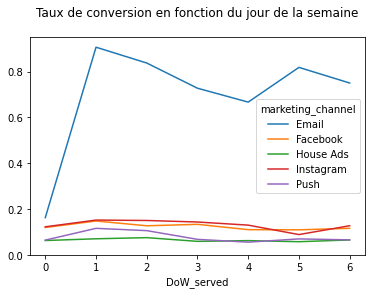

In [252]:
# Visualisation
DoW_df.plot()
plt.title("Taux de conversion en fonction du jour de la semaine\n")
plt.ylim(0)
plt.show()


### Preferences journalieres linguistiques des utilisateurs

In [253]:
# Nombre d'utilisateurs pour chaque langue préferée à chaque date
n_lang_per_date = marketing_df.groupby(['date_served', 'language_preferred'])['user_id'].nunique()
n_lang_per_date

date_served  language_preferred
2018-01-01   Arabic                  4
             English               342
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
                                  ... 
2018-01-30   Spanish                19
2018-01-31   Arabic                  8
             English               310
             German                  5
             Spanish                17
Name: user_id, Length: 121, dtype: int64

In [254]:
# Transformation du resultat en dataframe
n_lang_per_date = pd.DataFrame(n_lang_per_date.unstack(level=1))
n_lang_per_date.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,342.0,5.0,11.0
2018-01-02,4.0,355.0,5.0,10.0
2018-01-03,3.0,334.0,3.0,8.0
2018-01-04,2.0,305.0,2.0,14.0
2018-01-05,1.0,303.0,2.0,14.0


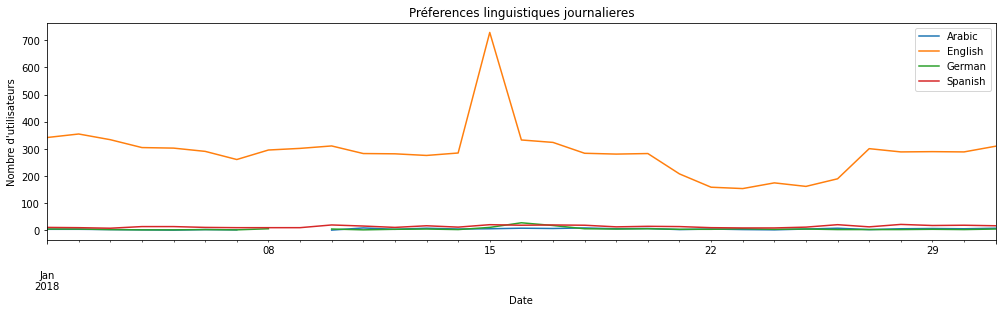

In [255]:
# Visualisation du resultat
n_lang_per_date.plot(figsize=(17, 4))
plt.title("Préferences linguistiques journalieres")
plt.xlabel("Date")
plt.ylabel("Nombre d'utilisateurs")
plt.legend(loc ='upper right', labels=n_lang_per_date.columns)
plt.show()

In [256]:
# La langue la plus populaire est de loin l'anglais

### Preferences linguistiques par groupe d'ages

In [257]:
# Nombre d'utilisateurs par groupes d'ages et langues preferées
n_util_per_age_per_lang = marketing_df.groupby(['age_group', 'language_preferred'])['user_id'].nunique()
n_util_per_age_per_lang

age_group    language_preferred
0-18 years   Arabic                  16
             English               1126
             German                  24
             Spanish                 43
19-24 years  Arabic                  18
             English               1218
             German                  23
             Spanish                 51
24-30 years  Arabic                  16
             English               1121
             German                  29
             Spanish                 54
30-36 years  Arabic                  12
             English                978
             German                  12
             Spanish                 57
36-45 years  Arabic                  13
             English                993
             German                  14
             Spanish                 39
45-55 years  Arabic                  14
             English                978
             German                  20
             Spanish                 47
55+ year

In [258]:
#transformation en dataframe
n_util_per_age_per_lang = pd.DataFrame(n_util_per_age_per_lang.unstack(level=1))
n_util_per_age_per_lang.head()

language_preferred,Arabic,English,German,Spanish
age_group,,,,
0-18 years,16,1126,24,43
19-24 years,18,1218,23,51
24-30 years,16,1121,29,54
30-36 years,12,978,12,57
36-45 years,13,993,14,39


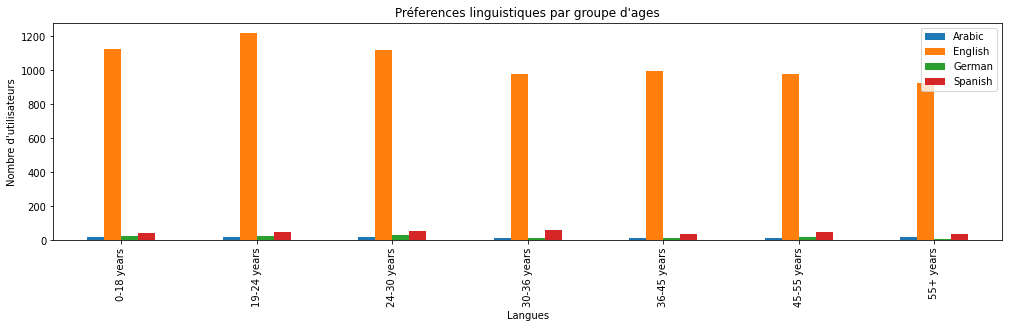

In [259]:
# Visualisation
n_util_per_age_per_lang.plot(kind='bar', figsize=(17, 4))
plt.title("Préferences linguistiques par groupe d'ages")
plt.xlabel("Langues")
plt.ylabel("Nombre d'utilisateurs")
plt.legend(loc ='upper right', labels=n_util_per_age_per_lang.columns)
plt.show()

In [260]:
# l'anglais reste la langue preferées quelque soit le groupe d'ages

### Canaux marketing selon le groupe d'ages

In [261]:
# Nombre d'utilisateurs par groupe d'ages et canal d'acquisition
n_util_per_age_per_canal = marketing_df.groupby(['age_group', 'marketing_channel'])['user_id'].nunique()
n_util_per_age_per_canal

age_group    marketing_channel
0-18 years   Email                 91
             Facebook             256
             House Ads            585
             Instagram            292
             Push                 184
19-24 years  Email                107
             Facebook             331
             House Ads            643
             Instagram            301
             Push                 144
24-30 years  Email                116
             Facebook             289
             House Ads            587
             Instagram            268
             Push                 180
30-36 years  Email                 60
             Facebook             238
             House Ads            600
             Instagram            252
             Push                  83
36-45 years  Email                 63
             Facebook             217
             House Ads            505
             Instagram            268
             Push                 192
45-55 years  Email 

In [262]:
# Transformation en dataframe
n_util_per_age_per_canal = pd.DataFrame(n_util_per_age_per_canal.unstack(level=1))
n_util_per_age_per_canal.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18 years,91,256,585,292,184
19-24 years,107,331,643,301,144
24-30 years,116,289,587,268,180
30-36 years,60,238,600,252,83
36-45 years,63,217,505,268,192


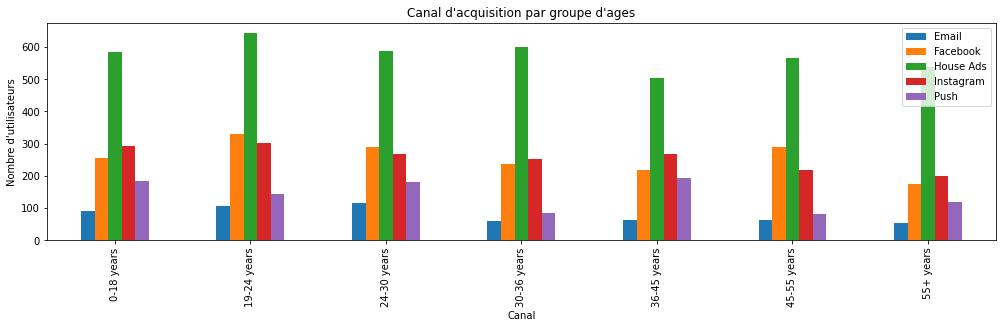

In [263]:
# Visualisation
n_util_per_age_per_canal.plot(kind='bar', figsize=(17, 4))
plt.title("Canal d'acquisition par groupe d'ages")
plt.xlabel("Canal")
plt.ylabel("Nombre d'utilisateurs")
plt.legend(loc ='upper right', labels=n_util_per_age_per_canal.columns)
plt.show()

In [264]:
# les annonces auto promotionnelle sont de loin les preferées quelque soit le groupe d'ages

### Fin